# 颜色空间的转换-RGB和XYZ

## 色彩空间rgb转XYZ

首先将rgb转换成RGB：
![](doc_imgs/03.png)

其中，gamma函数是r、g、b的gamma变换，gamma 2.2函数如下：

![](doc_imgs/04.png)

![](doc_imgs/05.png)

其中:
    ![](doc_imgs/06.png)

实现代码如下：

In [3]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from pyexcel_xls import get_data

In [4]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [5]:
def rgb2xyz(src):
    R = src[:,:,0]
    G = src[:,:,1]
    B = src[:,:,2]
    X = (B * 199049 + G * 394494 + R * 455033 + 524288) >> 20;
    Y = (B * 75675 + G * 749900 + R * 223002 + 524288) >> 20;
    Z = (B * 915161 + G * 114795 + R * 18621 + 524288) >> 20;
    dst = np.zeros_like(src)
    dst[:,:,0] = X
    dst[:,:,1] = Y
    dst[:,:,2] = Z
    return dst

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

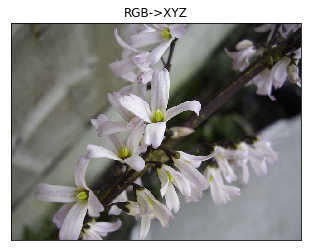

In [6]:
xyz = rgb2xyz(src)
plt.imshow(xyz)
plt.title('RGB->XYZ')
plt.xticks([]),plt.yticks([])

## XYZ转换成RGB

理论公式

![](doc_imgs/07.png)

![](doc_imgs/08.png)

![](doc_imgs/09.png)

其中r_gamma为R、G、B的gamma逆变换，gamma 2.2的逆变换函数如下：

![](doc_imgs/10.png)

实现代码如下：

In [8]:
def xyz2rgb(xyz):
    X = xyz[:,:,0]
    Y = xyz[:,:,1]
    Z = xyz[:,:,2]
    R = (X * 55460 - Y * 213955 + Z * 1207070) >> 20  
    G = (X * -965985 + Y * 1967119 + Z * 47442) >> 20            # x * -965985 和 -x * 965985 在反汇编后是不一样的，后者多了个neg指令  
    B = (X * 3229543 - Y * 1611819 - Z * 569148) >> 20  
   
    dst = np.zeros_like(xyz)
    dst[:,:,0] = B
    dst[:,:,1] = G
    dst[:,:,2] = R
    
    return cv2.convertScaleAbs(dst)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

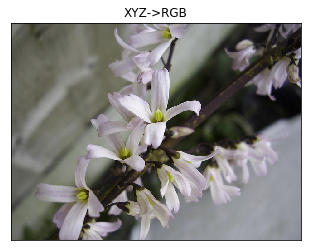

In [9]:
rgb = xyz2rgb(xyz)
plt.imshow(xyz)
plt.title('XYZ->RGB')
plt.xticks([]),plt.yticks([])

参考：

[1].https://blog.csdn.net/gubenpeiyuan/article/details/60577008

[2].https://blog.csdn.net/u014395105/article/details/28593697